# Подготовка данных

Импортируем разрешенные библиотеки:

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from prettytable import PrettyTable

Считаем исходный датасет в датафрейм библиотеки pandas:

In [51]:
data = pd.read_csv("/content/lab-4-data/california_housing_train.csv")

data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  median_house_value  
0          1015.0       472.0         1.4936             66900.0  
1          1129.0       463.0         1.8200             80100.0  
2           333.0       117.0         1.6509             85700.0  
3           515.0       226.0         3.1917             73400.0  
4           624.0       262.0         1.9250             65500.0  
...           ...         ...            ...                 ...  
16995       907.0       369.0         2.3571            111400.0  
16996      1194.0       465.0         2.5179             79000.0  
16997      1244.0       456.0         3.0313            103600.0  
16998      1298.0       478.0         1.9797             85800.0  
16999       806.0       270.0         3.0147             94600.0  

[17000 rows x 9 columns]

# Визуализация данных

Визуализируем статистику по датасету (количество, среднее значение, стандартное отклонение, минимум, максимум, квантили).

In [52]:
for column_name, params in data.items():
  count = len(params)
  minimum = min(params)
  maximum = max(params)
  mean = sum(params) / count

  # std
  tmp_sum = 0

  for el in params:
    tmp_sum += (el - mean)**2
  std = (tmp_sum / (count - 1))**(1/2)

  # quantiles
  q25 = None
  q50 = None
  q75 = None

  sorted_params = sorted(params)
  tmp_count = 0
  for el in sorted_params:
    tmp_count += 1
    if q25 is None and tmp_count/count > 0.25:
      q25 = el
    if q50 is None and tmp_count/count > 0.50:
      q50 = el
    if q75 is None and tmp_count/count > 0.75:
      q75 = el
      break

  print(column_name)
  print("---> count = ", count)
  print("---> min = ", minimum)
  print("---> max = ", maximum)
  print("---> mean = ", mean)
  print("---> std = ", std)
  print("---> q25 = ", q25)
  print("---> q50 aka median = ", q50)
  print("---> q75 = ", q75)

longitude
---> count =  17000
---> min =  -124.35
---> max =  -114.31
---> mean =  -119.56210823529375
---> std =  2.005166408426173
---> q25 =  -121.79
---> q50 aka median =  -118.49
---> q75 =  -118.0
latitude
---> count =  17000
---> min =  32.54
---> max =  41.95
---> mean =  35.6252247058827
---> std =  2.1373397946570734
---> q25 =  33.93
---> q50 aka median =  34.25
---> q75 =  37.72
housing_median_age
---> count =  17000
---> min =  1.0
---> max =  52.0
---> mean =  28.58935294117647
---> std =  12.586936981660335
---> q25 =  18.0
---> q50 aka median =  29.0
---> q75 =  37.0
total_rooms
---> count =  17000
---> min =  2.0
---> max =  37937.0
---> mean =  2643.664411764706
---> std =  2179.947071452768
---> q25 =  1462.0
---> q50 aka median =  2127.0
---> q75 =  3152.0
total_bedrooms
---> count =  17000
---> min =  1.0
---> max =  6445.0
---> mean =  539.4108235294118
---> std =  421.49945157986514
---> q25 =  297.0
---> q50 aka median =  434.0
---> q75 =  649.0
population
---> 

Выполним ту же операцию с использованием возможностей Pandas:

In [53]:
data.describe(include = "all")

longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    790.000000    282.000000       2.566375   
50%        434.000000   1167.000000    409.000000       3.544600   
75%        648.250000   1721.000000    605.250000       4.767000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        17000.000000  
mean        207300.912353  
std         115983.764387  
min          14999.000000  
25%         119400.000000  
50%         180400.000000  
75%         265000.000000  
max         500001.000000

# Предварительная обработка данных

## Анализ отсутствующих значений

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [55]:
data.shape

(17000, 9)

Просмотрим количество отсутствующих значений по каждой колонке:

In [56]:
missing_data = data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

longitude
False    17000
Name: longitude, dtype: int64
 
latitude
False    17000
Name: latitude, dtype: int64
 
housing_median_age
False    17000
Name: housing_median_age, dtype: int64
 
total_rooms
False    17000
Name: total_rooms, dtype: int64
 
total_bedrooms
False    17000
Name: total_bedrooms, dtype: int64
 
population
False    17000
Name: population, dtype: int64
 
households
False    17000
Name: households, dtype: int64
 
median_income
False    17000
Name: median_income, dtype: int64
 
median_house_value
False    17000
Name: median_house_value, dtype: int64
 


Итого в каждой колонке отсутствует:

In [57]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

## Кодирование категориальных признаков

In [58]:
encoded_data = data.astype({'housing_median_age': int, 'total_rooms': int, 'total_bedrooms': int, 'population': int, 'households': int, 'median_house_value': int})
encoded_data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms          int64
population              int64
households              int64
median_income         float64
median_house_value      int64
dtype: object

После кодирования:

In [59]:
encoded_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                  15         5612            1283   
1        -114.47     34.40                  19         7650            1901   
2        -114.56     33.69                  17          720             174   
3        -114.57     33.64                  14         1501             337   
4        -114.57     33.57                  20         1454             326   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                  52         2217             394   
16996    -124.27     40.69                  36         2349             528   
16997    -124.30     41.84                  17         2677             531   
16998    -124.30     41.80                  19         2672             552   
16999    -124.35     40.54                  52         1820             300   

       population  households  median_income  median_house_value  
0            1015         472         1.4936               66900  
1            1129         463         1.8200               80100  
2             333         117         1.6509               85700  
3             515         226         3.1917               73400  
4             624         262         1.9250               65500  
...           ...         ...            ...                 ...  
16995         907         369         2.3571              111400  
16996        1194         465         2.5179               79000  
16997        1244         456         3.0313              103600  
16998        1298         478         1.9797               85800  
16999         806         270         3.0147               94600  

[17000 rows x 9 columns]

## Нормировка

### Подготовка

Перед нормировкой разделим данные:

- Y = label = `median_house_value` - целевой аттрибут

- X - независимые переменные

In [60]:
X = encoded_data.drop('median_house_value', axis=1)
Y = encoded_data['median_house_value']

И изучим распределения данных:

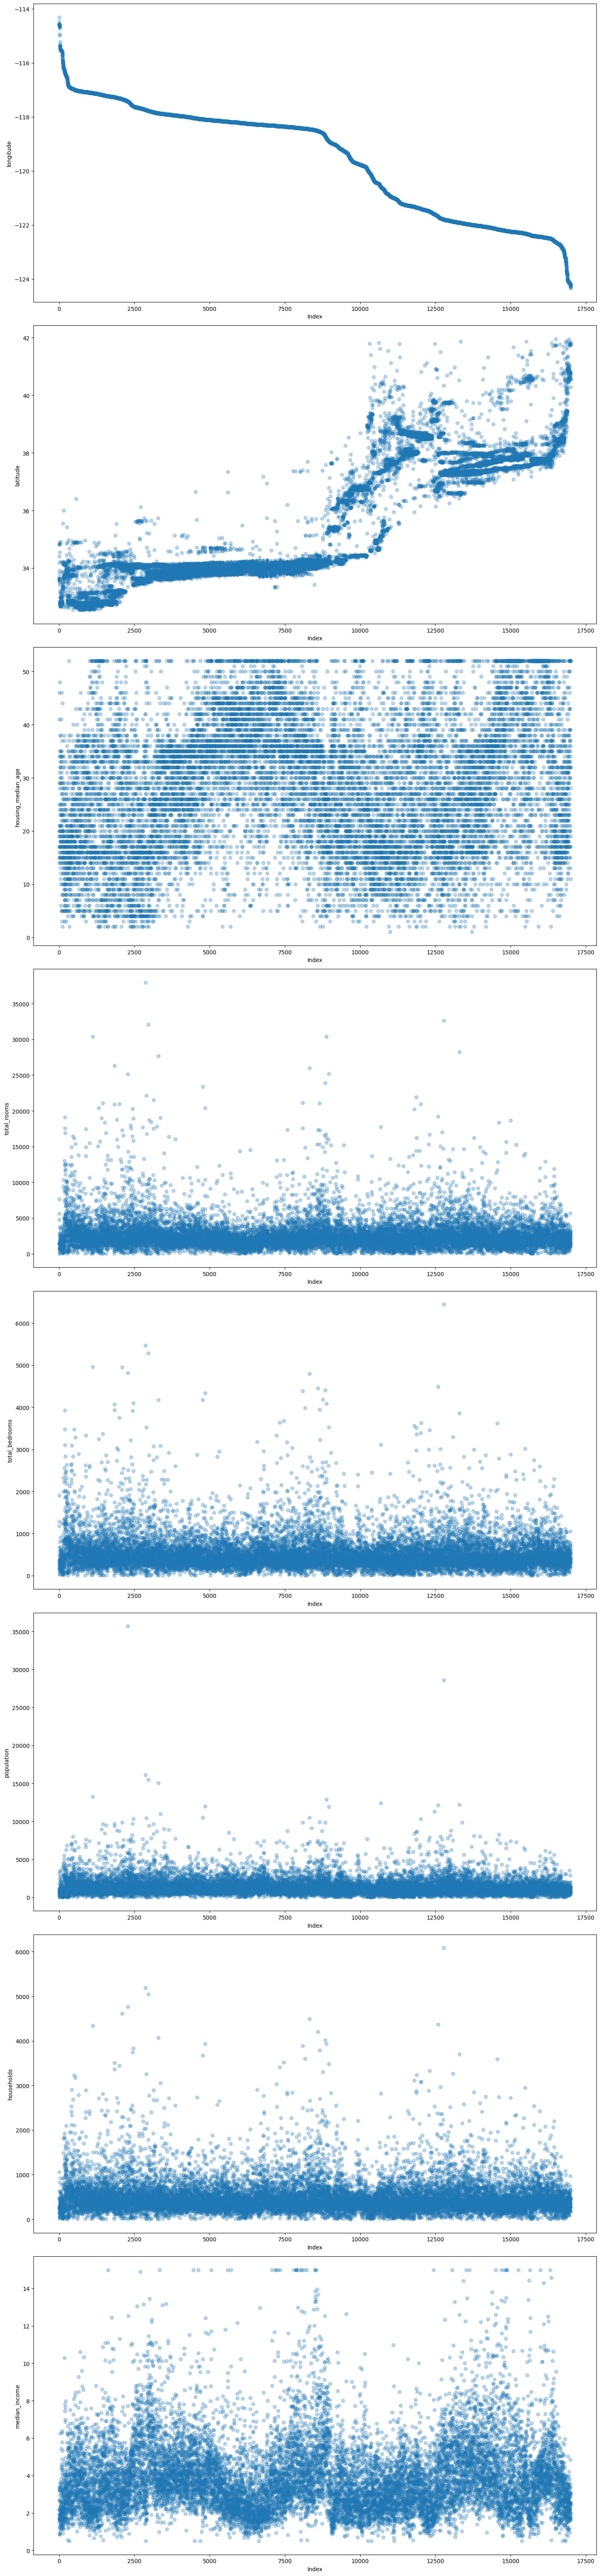

In [61]:
columns = X.columns

fig, axes = plt.subplots(len(columns), 1, figsize=(15, len(columns)*8))

for i, column in enumerate(columns):
    axes[i].scatter(range(len(X)), X[column], alpha=0.3)
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

### Нормировка minmax

In [62]:
for column_name, params in X.items():
  minimum = min(params)
  maximum = max(params)
  difference = maximum - minimum
  X[column_name] = (X[column_name] - minimum) / difference

После нормировки:

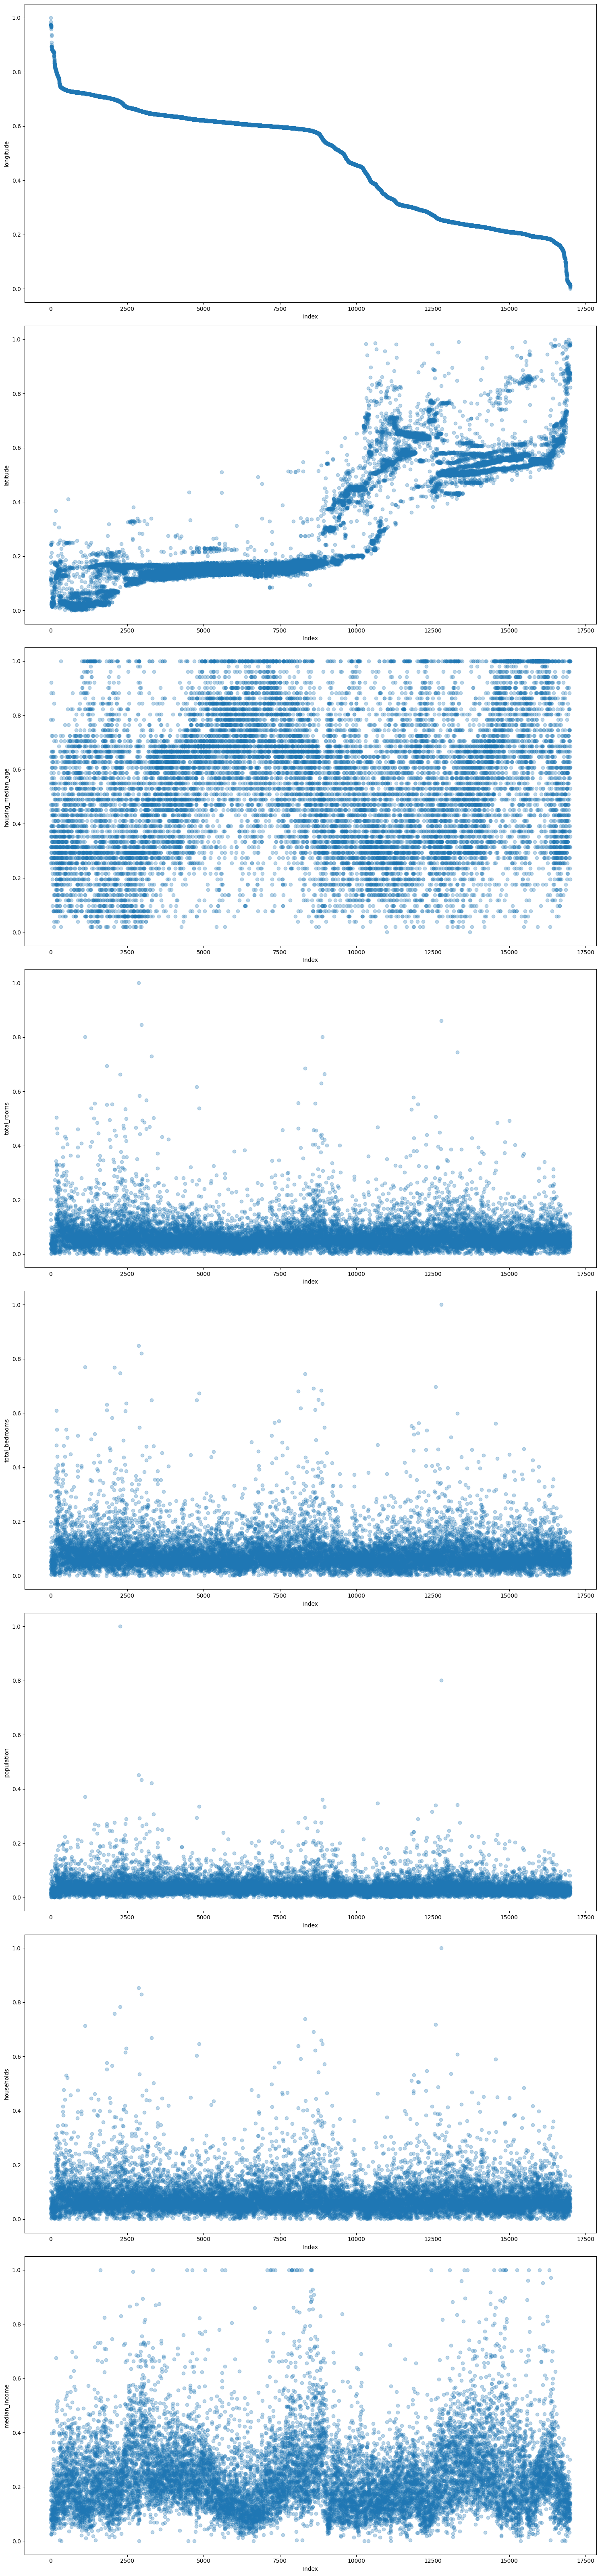

In [63]:
columns = X.columns

fig, axes = plt.subplots(len(columns), 1, figsize=(15, len(columns)*8))

for i, column in enumerate(columns):
    axes[i].scatter(range(len(X)), X[column], alpha=0.3)
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

# Разделение данных на обучающую и тестовую выборки

## Данные до разделения

In [64]:
X

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       1.000000  0.175345            0.274510     0.147885        0.198945   
1       0.984064  0.197662            0.352941     0.201608        0.294848   
2       0.975100  0.122210            0.313725     0.018927        0.026847   
3       0.974104  0.116897            0.254902     0.039515        0.052142   
4       0.974104  0.109458            0.372549     0.038276        0.050435   
...          ...       ...                 ...          ...             ...   
16995   0.008964  0.854410            1.000000     0.058389        0.060987   
16996   0.007968  0.866100            0.686275     0.061869        0.081782   
16997   0.004980  0.988310            0.313725     0.070515        0.082247   
16998   0.004980  0.984060            0.352941     0.070384        0.085506   
16999   0.000000  0.850159            1.000000     0.047924        0.046400   

       population  households  median_income  
0        0.028364    0.077454       0.068530  
1        0.031559    0.075974       0.091040  
2        0.009249    0.019076       0.079378  
3        0.014350    0.037000       0.185639  
4        0.017405    0.042921       0.098281  
...           ...         ...            ...  
16995    0.025337    0.060516       0.128081  
16996    0.033381    0.076303       0.139170  
16997    0.034782    0.074823       0.174577  
16998    0.036296    0.078441       0.102054  
16999    0.022506    0.044236       0.173432  

[17000 rows x 8 columns]

In [65]:
Y

0         66900
1         80100
2         85700
3         73400
4         65500
          ...  
16995    111400
16996     79000
16997    103600
16998     85800
16999     94600
Name: median_house_value, Length: 17000, dtype: int64

## Разделение

In [66]:
# Список индексов данных
indices = list(range(len(X)))

# Размер тестовой выборки
test_size = 0.2 # 20%

# Начальное состояние генератора случайных чисел
random.seed(42)

# Шафлим данные (чтобы потом не балансировать)
random.shuffle(indices)

split_index = int(len(X) * test_size)

X_train = X.iloc[indices[split_index:]]
X_test = X.iloc[indices[:split_index]]
Y_train = Y.iloc[indices[split_index:]]
Y_test = Y.iloc[indices[:split_index]]

## Данные после разделения

In [67]:
X_train

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2965    0.654382  0.164718            0.607843     0.069619        0.079919   
3936    0.636454  0.154091            0.470588     0.073731        0.060056   
5646    0.614542  0.151966            0.490196     0.181706        0.291124   
12705   0.256972  0.546227            0.686275     0.044418        0.057573   
5685    0.614542  0.131775            1.000000     0.031053        0.058970   
...          ...       ...                 ...          ...             ...   
7314    0.598606  0.147715            0.705882     0.043126        0.063004   
8024    0.590637  0.180659            0.313725     0.053961        0.084885   
9012    0.537849  0.243358            0.333333     0.086358        0.118094   
819     0.725100  0.027630            0.686275     0.053407        0.054004   
3648    0.640438  0.143464            0.215686     0.048952        0.060832   

       population  households  median_income  
2965     0.052103    0.078441       0.221914  
3936     0.037697    0.063805       0.396670  
5646     0.239581    0.297155       0.125350  
12705    0.026542    0.061010       0.210570  
5685     0.029233    0.054432       0.073130  
...           ...         ...            ...  
7314     0.037501    0.060516       0.177087  
8024     0.062782    0.088801       0.139660  
9012     0.037417    0.090281       0.171667  
819      0.022899    0.057721       0.240197  
3648     0.017349    0.051801       0.312127  

[13600 rows x 8 columns]

In [68]:
Y_train

2965     177200
3936     311100
5646     154500
12705    158400
5685     162500
          ...  
7314     167700
8024     163700
9012     116500
819      168900
3648     161800
Name: median_house_value, Length: 13600, dtype: int64

Преобразуем данные в матрицы для дальнейшей работы

In [69]:
X_train_matrix = np.c_[np.ones(len(X_train.values)), X_train.values]
X_test_matrix = np.c_[np.ones(len(X_test.values)), X_test.values]
Y_train_matrix = Y_train.values
Y_test_matrix = Y_test.values

In [70]:
X_train_matrix

array([[1.        , 0.65438247, 0.16471838, ..., 0.05210348, 0.07844105,
        0.22191418],
       [1.        , 0.63645418, 0.15409139, ..., 0.03769724, 0.0638053 ,
        0.39667039],
       [1.        , 0.61454183, 0.15196599, ..., 0.23958071, 0.29715507,
        0.12535   ],
       ...,
       [1.        , 0.53784861, 0.24335813, ..., 0.03741697, 0.0902812 ,
        0.1716666 ],
       [1.        , 0.7250996 , 0.02763018, ..., 0.02289862, 0.05772077,
        0.24019669],
       [1.        , 0.64043825, 0.1434644 , ..., 0.01734914, 0.05180069,
        0.31212673]])

# Методы линейной регрессии

## Матричный метод

### Обучение модели на тренировочных данных

In [71]:
B = np.dot(np.dot(np.linalg.inv(np.dot(X_train_matrix.transpose(), X_train_matrix)), X_train_matrix.transpose()), Y_train_matrix)

### Предсказание на тестовых данных

In [72]:
matrix_method_prediction = np.dot(X_test_matrix, B)

## Скалярный метод

### Подготовка данных

In [73]:
X_train_matrix = X_train.values # из тренировочных данных необходимо убрать 1-цы, потому что скалярный метод предполагает работу без них
# а вот в тестовых данных 1-цы надо оставить, потому, что вектор решений включает свободный член

### Обучение модели на тренировочных данных

In [74]:
n = len(X_train_matrix)
width = len(X_train_matrix[0])
A = []
B = []

# B:
B.append(sum(Y_train_matrix))
for i in range(width):
  B.append(sum(Y_train_matrix * X_train_matrix[:, i]))

# A:

A.append([])
tmp = A[0]
tmp.append(n)
for i in range(width):
  tmp.append(sum(X_train_matrix[:, i]))

for i in range(width):
  A.append([])
  tmp = A[i+1]
  tmp.append(sum(X_train_matrix[:, i]))
  for j in range(width):
    tmp.append(sum(X_train_matrix[:, i] * X_train_matrix[:, j]))

solution = np.linalg.solve(A, B)

### Предсказание на тестовых данных

In [75]:
scalar_method_prediction = np.dot(X_test_matrix, solution)

# Оценка производительности методов ЛР

## Сравнение двух методов

In [76]:
mean = sum(Y_test.values) / len(Y_test.values)

matrix_SSR = sum(np.square(Y_test.values - matrix_method_prediction))
matrix_SST = sum(np.square(Y_test.values - mean))

r2_matrix = 1 - (matrix_SSR / matrix_SST)

scalar_SSR = sum(np.square(Y_test.values - scalar_method_prediction))
scalar_SST = sum(np.square(Y_test.values - mean))

r2_scalar = 1 - (scalar_SSR / scalar_SST)

print("matrix:", r2_matrix)
print("scalar:", r2_scalar)

matrix: 0.6596384613267121
scalar: 0.6596384613267039


## Результат сравнения

`Матричный` метод оказался чуть более точным, поэтому дальнейшую работу с моделями я буду выполнять на нем

# Создание различных моделей

## Метод грубой силы

In [77]:
r2_scores = ['r2_score']
columns_names = ['characteristic']
diffs = ['diffs']
is_better = ['is better?']

columns = X_train.columns
mean = sum(Y_test.values) / len(Y_test.values)

for i, column in enumerate(columns):
  columns_names.append(column)
  tmp_X_train_matrix = np.c_[np.ones(len(X_train.values)), X_train.drop(column, axis=1).values]
  tmp_X_test_matrix = np.c_[np.ones(len(X_test.values)), X_test.drop(column, axis=1).values]
  tmp_Y_train_matrix = Y_train.values
  tmp_Y_test_matrix = Y_test.values

  tmp_B = np.dot(np.dot(np.linalg.inv(np.dot(tmp_X_train_matrix.transpose(), tmp_X_train_matrix)), tmp_X_train_matrix.transpose()), tmp_Y_train_matrix)

  tmp_matrix_method_prediction = np.dot(tmp_X_test_matrix, tmp_B)

  tmp_matrix_SSR = sum(np.square(Y_test.values - tmp_matrix_method_prediction))
  tmp_matrix_SST = sum(np.square(Y_test.values - mean))

  tmp_r2_matrix = 1 - (tmp_matrix_SSR / tmp_matrix_SST)
  r2_scores.append(tmp_r2_matrix)
  diffs.append(tmp_r2_matrix - r2_matrix)
  is_better.append(tmp_r2_matrix - r2_matrix > 0)

## Результат отбрасывания аттрибутов

In [78]:
table = PrettyTable(columns_names)
table.add_row(r2_scores)
table.add_row(diffs)
table.add_row(is_better)
print(table)

+----------------+----------------------+----------------------+-----------------------+------------------------+-----------------------+-----------------------+-----------------------+---------------------+
| characteristic |      longitude       |       latitude       |   housing_median_age  |      total_rooms       |     total_bedrooms    |       population      |       households      |    median_income    |
+----------------+----------------------+----------------------+-----------------------+------------------------+-----------------------+-----------------------+-----------------------+---------------------+
|    r2_score    |  0.5857268848743007  |  0.5797485624790752  |   0.6480098051700109  |   0.6591055776982531   |   0.6535590887315688  |   0.6376494371336465  |   0.6600723236792543  |  0.4007071687939292 |
|     diffs      | -0.07391157645241142 | -0.07988989884763686 | -0.011628656156701167 | -0.0005328836284590466 | -0.006079372595143351 | -0.021989024193065587 | 0.0004

### Аттрибут, оказывающий наибольшее влияние на предсказание:

In [79]:
max_diff = abs(diffs[1])
index_of_max_diff = 1
for i in range(1, len(diffs)):
  if abs(diffs[i]) >= max_diff:
    max_diff = abs(diffs[i])
    index_of_max_diff = i
print(columns_names[index_of_max_diff])

median_income


### Аттрибуты, понижающие точность предсказания:

In [80]:
for i in range(1, len(is_better)):
  if is_better[i] == True:
    print(columns_names[i])

households
